<h1><b> The Sparks Foundation </b></h1>
<h2><b>Author: Anu Rithiga B</b></h2>
<h3><b>Task 2</b>: Prediction using unsupervised ML. From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.<br>
<b>Dataset:</b>  https://bit.ly/3kXTdox <br>
<b>Date</b>: 17/7/2021

<h2><b>Step 1: Importing Libraries

## Unsupervised Machine Learning - Clustering(Iris DataSet):
To predict the optimum number of clusters and represent it visually for the given Iris data set.

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

<h2><b>Step 2: Importing Dataset 

In [ ]:

df = pd.read_csv("/Iris.csv")
df.head() 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<h2><b>Step 3: Data Exploration 

<b> Size of the dataset 

In [ ]:
df.size

900

<b>Shape of the dataset 

In [ ]:

df.shape

(150, 6)

<b>To check for any null values 

In [ ]:

df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<b>Summary of the dataset 

In [ ]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


<b>Datatypes involved in the dataset 

In [ ]:
print(df.dtypes)
print(df.info())

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


<h2><b>Step 4: Data Cleaning 

<b>To find any outliers in the dataset 

In [ ]:
Y = df.iloc[0:,1:5]

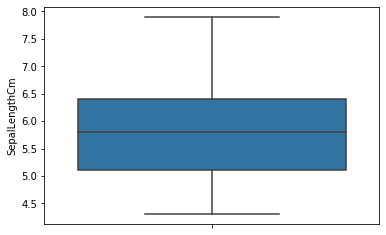

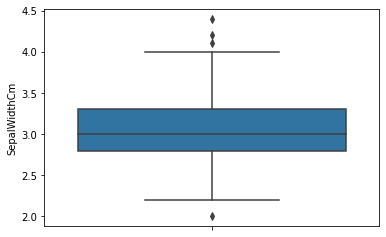

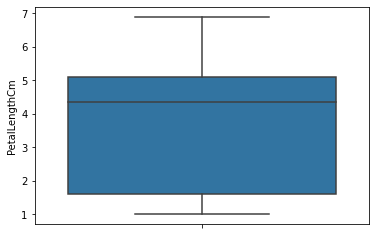

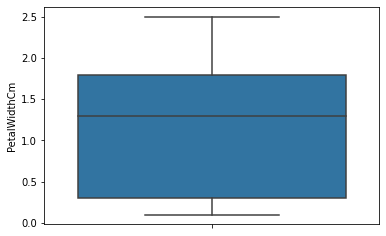

In [ ]:

cols = Y.columns
for i in cols:
    sns.boxplot(y=Y[i])
    plt.show()

- From the above boxplot we can say that there are outliers in the column 'SepalWidthCm'

<b> To remove outliers from Sepal Width column 

In [ ]:

q1 = df['SepalWidthCm'].quantile(0.25)
q3 = df['SepalWidthCm'].quantile(0.75)
iqr = q3 - q1
df = df[(df['SepalWidthCm'] >= q1-1.5*iqr) & (df['SepalWidthCm'] <= q3+1.5*iqr)]
df.shape 

(146, 6)

- We can see that after outlier treatment the number of rows are reduced to 146 from 150

<b> Visualizing after removing the outliers 

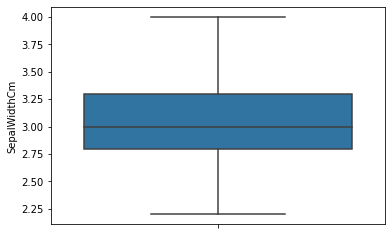

In [ ]:

sns.boxplot(y=df['SepalWidthCm'])
plt.show()

 The outliers are removed. YAyy

<b> Standardizing the dataset to remove biasing 

In [ ]:

standard_scaler = StandardScaler()
Y_norm = standard_scaler.fit_transform(Y)

<h3><b>Observations:<br></b></h3>
1. There are no missing values in the dataset.<br> 
2. There are some outliers in the dataset and they were cleaned. <br> 
3. Datatype conversion is not required.<br>  
4. Dataset is suitable to perform clustering techniques.<br>  
5. None of the columns has missing data values.<br> 
6. Data has been scaled to avoid biasing of the dataset

<h2><b>Step 5: Data Visualization 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


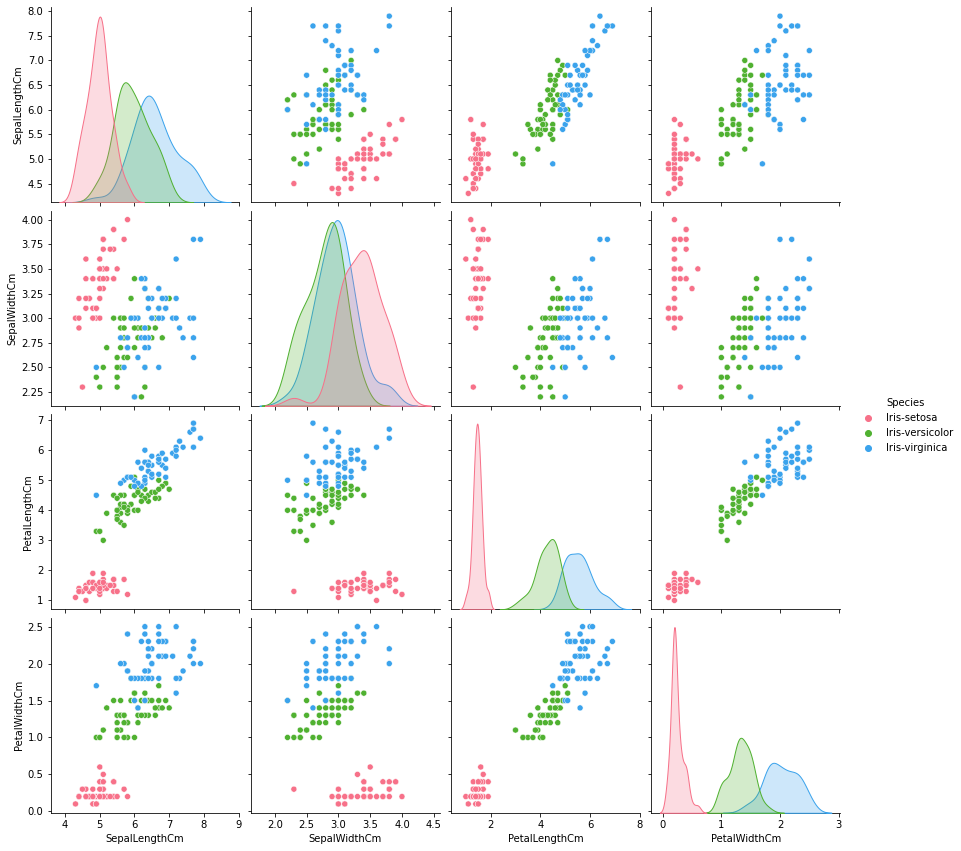

In [ ]:
sns.pairplot(df.drop("Id", axis=1), hue="Species", palette="husl", size=3)


<b>From the pairplot, we'll see that the Iris-setosa species is separated from the other two across all feature combinations

<b>Multivariate visualization technique using radviz Which puts each feature as a point on a 2D plane, and then simulates having each sample attached to those points through a spring weighted by the relative value for that feature

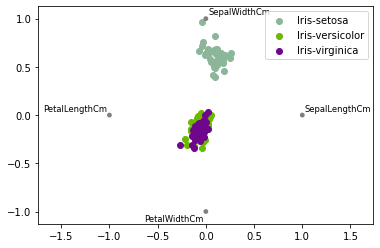

In [ ]:
from pandas.plotting import radviz
radviz(df.drop("Id", axis=1), "Species")

<b>Plotting Andrews curves 

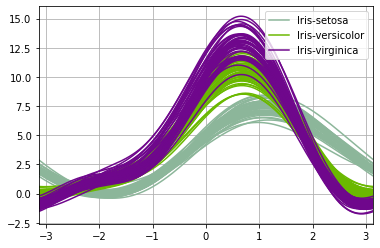

In [ ]:
from pandas.plotting import andrews_curves
andrews_curves(df.drop("Id", axis=1), "Species")

<h2><b>Step 6: Finding the optimal number of Clusters 

In [ ]:

cluster_range = range(1,20)
cluster_errors = []

for num_cluster in cluster_range:
    clusters = KMeans(num_cluster, n_init = 10)
    clusters.fit(Y_norm)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
    
clusters_df = pd.DataFrame({'num_cluster': cluster_range, 'cluster_errors': cluster_errors})
clusters_df[0:20]

,num_cluster,cluster_errors
0,1,600.000000
1,2,223.732006
2,3,140.965817
3,4,114.362815
4,5,91.029169
5,6,81.864846
6,7,71.274433
7,8,63.209066
8,9,55.881088
9,10,47.330325


<b> Using Elbow method using distortion to find optimal number of clusters 

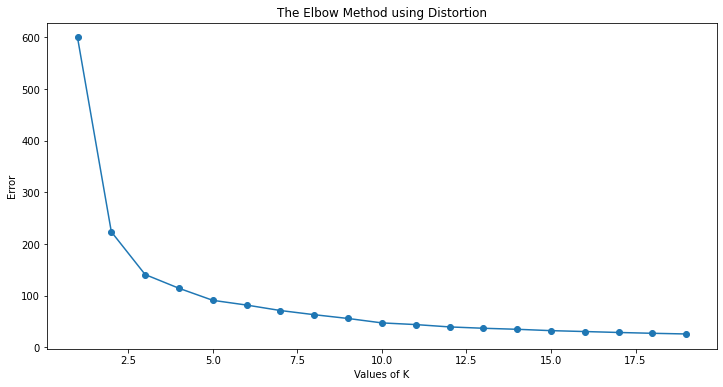

In [ ]:

plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_cluster, clusters_df.cluster_errors, marker = 'o') 
plt.xlabel('Values of K') 
plt.ylabel('Error') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

<b><h3> From the above elbow curve we can say that '3' is the optimal number of cluster 

<h2><b>Step 7: Training the dataset using KMeans clustering 

In [ ]:

model = KMeans(n_clusters=3, max_iter=50)
model.fit(Y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:

Y.index = pd.RangeIndex(len(Y.index))
df_km = pd.concat([Y, pd.Series(model.labels_)], axis=1)
df_km.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'ClusterID']

km_clusters_Slength = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'SepalLengthCm':'mean'}))
km_clusters_Swidth = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'SepalWidthCm':'mean'}))
km_clusters_Plength = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'PetalLengthCm':'mean'}))
km_clusters_Pwidth = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'PetalWidthCm':'mean'}))

<b> Creating the dataframe consisting of the mean value of centroids with cluster ID

In [ ]:
df2 = pd.concat([pd.Series([0,1,2]), km_clusters_Slength, km_clusters_Swidth, km_clusters_Plength, km_clusters_Pwidth
                ], axis=1)
df2.columns = ['ClusterID','SepalLengthCm_mean','SepalWidthCm_mean','PetalLengthCm_mean',
               'PetalWidthCm_mean']
df2.head()

,ClusterID,SepalLengthCm_mean,SepalWidthCm_mean,PetalLengthCm_mean,PetalWidthCm_mean
0,0,5.006000,3.418000,1.464000,0.244000
1,1,5.901613,2.748387,4.393548,1.433871
2,2,6.850000,3.073684,5.742105,2.071053


<h2><b>Step 8: Visualizing the clusters

<b>Count plot for Cluster ID column 

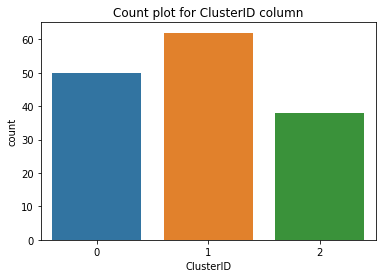

In [ ]:
sns.countplot(x=df_km.ClusterID)
plt.title('Count plot for ClusterID column')
plt.show()

<b>

<b>Heirarchical clustering with full dendrogram

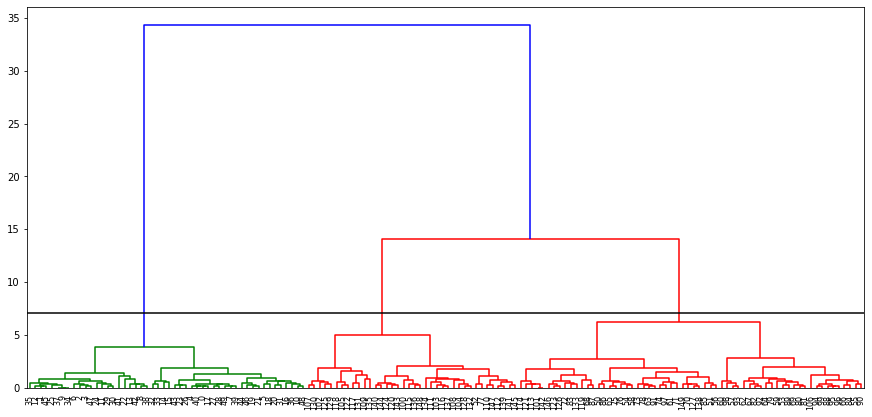

In [ ]:

plt.figure(figsize=(15,7))
mergings = linkage(df_km, method = 'ward', metric='euclidean')
max_d = 7.08                
dendrogram(mergings,
           truncate_mode='lastp',  
           p=200,                  
           leaf_rotation=90.,      
           leaf_font_size=8.,      
          )

plt.axhline(y=max_d, c='k')
plt.show()

<b>Heirarchical clustering with full dendrogram for 50

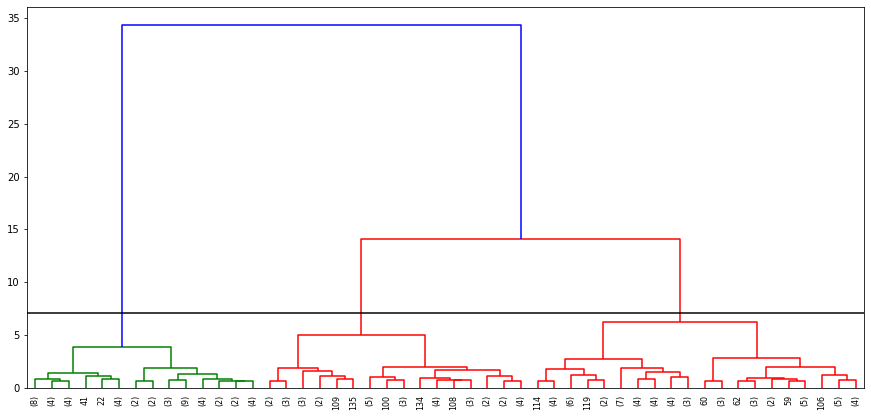

In [ ]:

plt.figure(figsize=(15,7))
mergings = linkage(df_km, method = 'ward', metric='euclidean')


max_d = 7.08                
dendrogram(mergings,
           truncate_mode='lastp',  
           p=50,                  
           leaf_rotation=90.,      
           leaf_font_size=8.,      
          )

plt.axhline(y=max_d, c='k')
plt.show()



 <b><h2>From the above two dendrogram we can say that there are three clusters 

<b>Scatter plot for visualizing the clusters 

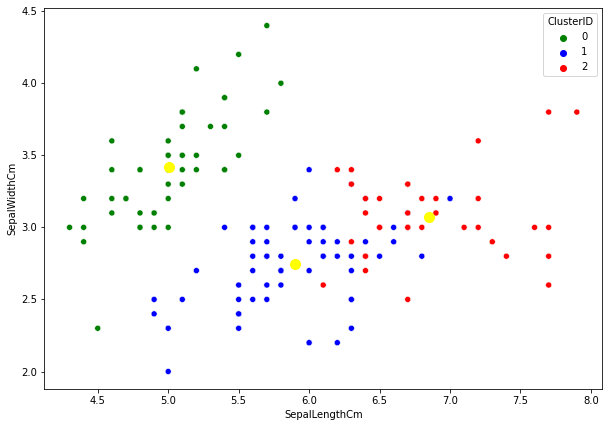

In [ ]:
# Scatter plot to visualize the clusters
plt.figure(figsize=(10,7))
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm', data=df_km, hue='ClusterID', palette=['green','blue','red'])

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.show()

<b><h1>Thank You!! Have a good day 